In [50]:
import shap
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
shap.initjs()


In [51]:
file = '/Users/kiananasiri/Desktop/Machine Learning/regressionProj/datareg.csv'


In [52]:
df= pd.read_csv(file)
df.head()
df.describe()

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


#### Cheking if there are null values in the data

In [53]:
df = df.dropna()


In [54]:
df = df.dropna( subset=['Area' , 'Address'] )
nulls = df.isnull().sum()
nulls

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address       0
Price         0
Price(USD)    0
dtype: int64

#### Convert nonnumerical columns to numerical form

In [55]:
#transformin address to numerical
Address = df['Address']
le = LabelEncoder()
le.fit(Address)
df['Address'] = le.transform(Address)

In [56]:
#converting area to numeric 
df['Area'] = pd.to_numeric(df['Area'] , errors='coerce')
df['Area']

0        63.0
1        60.0
2        79.0
3        95.0
4       123.0
        ...  
3474     86.0
3475     83.0
3476     75.0
3477    105.0
3478     82.0
Name: Area, Length: 3456, dtype: float64

In [57]:
#converting boolean types columns to numeric
df[['Parking' , 'Warehouse' , 'Elevator']] = df[['Parking' , 'Warehouse' , 'Elevator']].astype('int64')
df.dtypes

Area          float64
Room            int64
Parking         int64
Warehouse       int64
Elevator        int64
Address         int64
Price         float64
Price(USD)    float64
dtype: object

#### Hisogram


In [9]:
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,1,1,1,156,1.850000e+09,61666.67
1,60.0,1,1,1,1,156,1.850000e+09,61666.67
2,79.0,2,1,1,1,117,5.500000e+08,18333.33
3,95.0,2,1,1,1,152,9.025000e+08,30083.33
4,123.0,2,1,1,1,150,7.000000e+09,233333.33


array([[<Axes: title={'center': 'Area'}>,
        <Axes: title={'center': 'Room'}>,
        <Axes: title={'center': 'Parking'}>],
       [<Axes: title={'center': 'Warehouse'}>,
        <Axes: title={'center': 'Elevator'}>,
        <Axes: title={'center': 'Address'}>],
       [<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Price(USD)'}>, <Axes: >]], dtype=object)

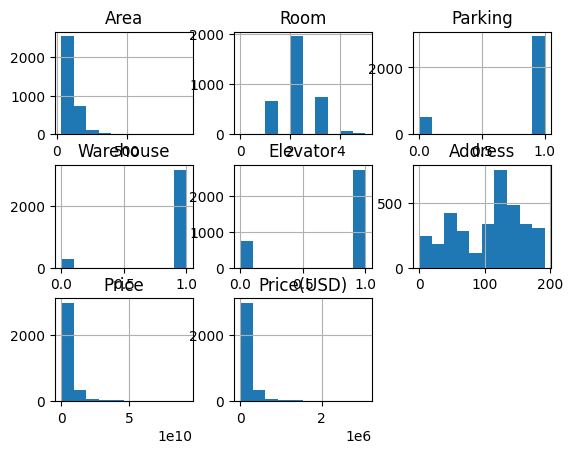

In [10]:
df.hist()

#### Scatterplot of features

In [11]:
y = df['Price']

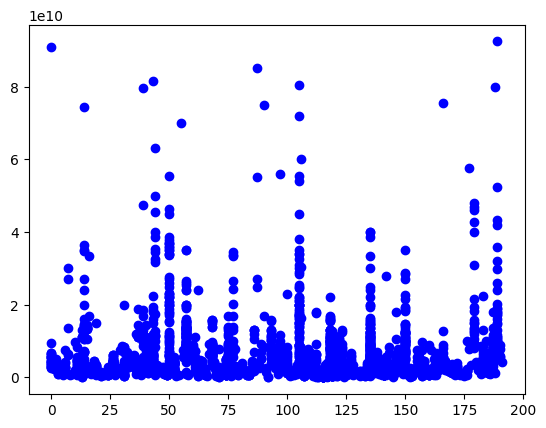

In [12]:
plt.scatter( df['Address'] ,  y , color='blue')
plt.show()

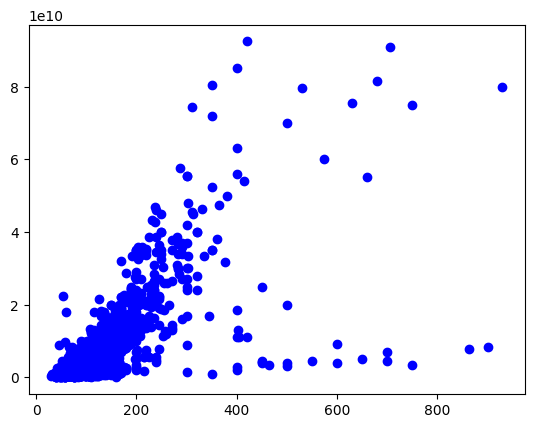

In [13]:
y = df['Price']
plt.scatter( df['Area'] ,  y , color='blue')
plt.show()

Some samples in the "Area" feature looks like noise, so here I tried to delete those ones.
I used variance , std and mean to select whcih one of data samples are noise.

In [14]:
mean_area = df['Area'].mean()
std_area = df['Area'].std()
variance_area = df['Area'].var()

print("Mean of Area:", mean_area)
print("Standard Deviation of Area:", std_area)
print("Variance of Area:", variance_area)

Mean of Area: 106.91739130434783
Standard Deviation of Area: 69.55097556015312
Variance of Area: 4837.338201369017


### Identifying noisy samples in 'Area' and deleting them ( filtered data).
Scatter plot of area faeture after removing outliers.

In [58]:
lower_bound = mean_area - 2 * std_area
upper_bound = mean_area + 2 * std_area

# Filter out outliers
outliers = df[(df['Area'] < lower_bound) | (df['Area'] > upper_bound)]


In [59]:
df = df[(df['Area'] >= lower_bound) & (df['Area'] <= upper_bound)]
y = df['Price']

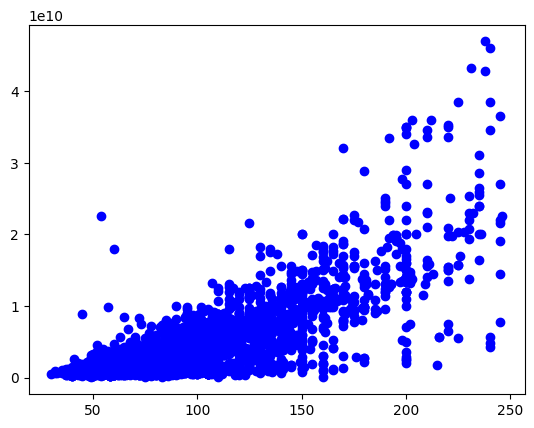

In [60]:
plt.scatter( df['Area'] ,  y , color='blue')
plt.show()

#### Scale to show data on scatterplot

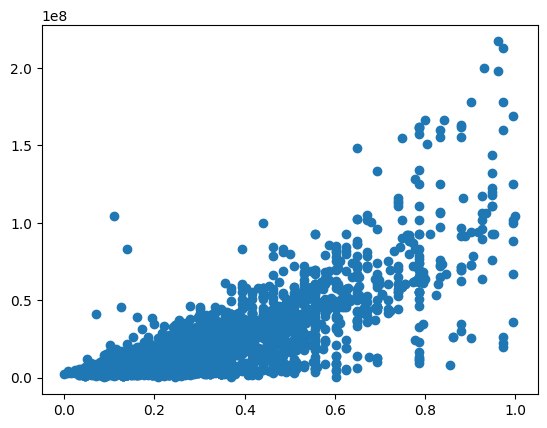

In [61]:
from sklearn.preprocessing import MinMaxScaler

areas = np.array( df['Area'] ) 
prices = np.array ( df['Price'] ) 

# Reshape the arrays if needed (required by MinMaxScaler)
areas = areas.reshape(-1, 1)
prices = prices.reshape(-1, 1)

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the data and transform the data
normalized_areas = scaler.fit_transform(areas)
normalized_prices = scaler.transform(prices)


plt.scatter ( normalized_areas , normalized_prices  )
plt.show()

# Using Shap to select most affective features 

## Selecting features

In [67]:
features = [ 'Area', 'Room', 'Elevator', 'Address' , 'Warehouse' , 'Parking' ] 
X = df[features]
x_train , x_test , y_train , y_test = train_test_split(X , y , random_state=1)

### Modle with Scaling and prediction 

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor


scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)


# Fit the regression model
regression_model =  RandomForestRegressor()
regression_model.fit(X_train_scaled, y_train)

y_pred = regression_model.predict(X_test_scaled)
print ( "R2-score: %.2f" % r2_score(y_test , y_pred) ) 

R2-score: 0.80


## Without Scalling - Regression Model -> RandomForest and Prediction 


In [64]:
reg = RandomForestRegressor()
reg.fit( x_train , y_train )

RandomForestRegressor()

### Prediction 

In [65]:
from sklearn.metrics import r2_score

predicts = reg.predict(x_test)

print("Mean absolute error: %.2f" % np.mean(np.absolute(predicts - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((predicts - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test , predicts) )

Mean absolute error: 1138094575.19
Residual sum of squares (MSE): 4426792901493480448.00
R2-score: 0.80


#### I used  shap plot to determine most affective features 

In [66]:
explainer = shap.Explainer(reg)
shap_values = explainer.shap_values(x_test)

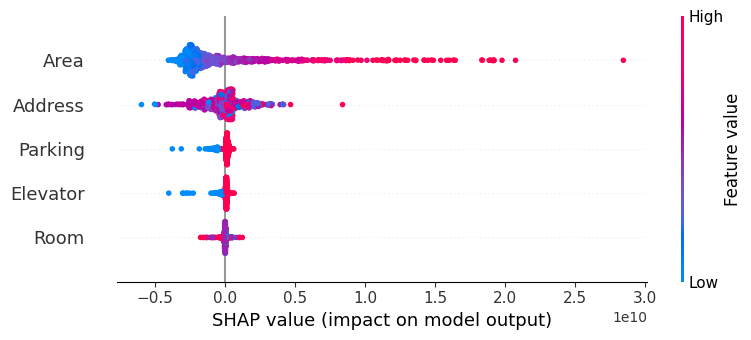

In [46]:
shap.summary_plot(shap_values, x_test)

# Removing some features and train again
### According to shap plot above I decided to remove WareHouse and parking  and then run my model again.

In [70]:
features = [ 'Area', 'Parking', 'Room' , 'Elevator', 'Address'  ] 
X = df[features]
y = df['Price']
x_train , x_test , y_train , y_test = train_test_split(X , y , random_state=1)

In [71]:
from sklearn.metrics import r2_score
reg = RandomForestRegressor()
reg.fit( x_train , y_train )


predicts = reg.predict(x_test)

print("Mean absolute error: %.2f" % np.mean(np.absolute(predicts - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((predicts - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test , predicts) )

Mean absolute error: 1162312225.78
Residual sum of squares (MSE): 4578477205826039296.00
R2-score: 0.79


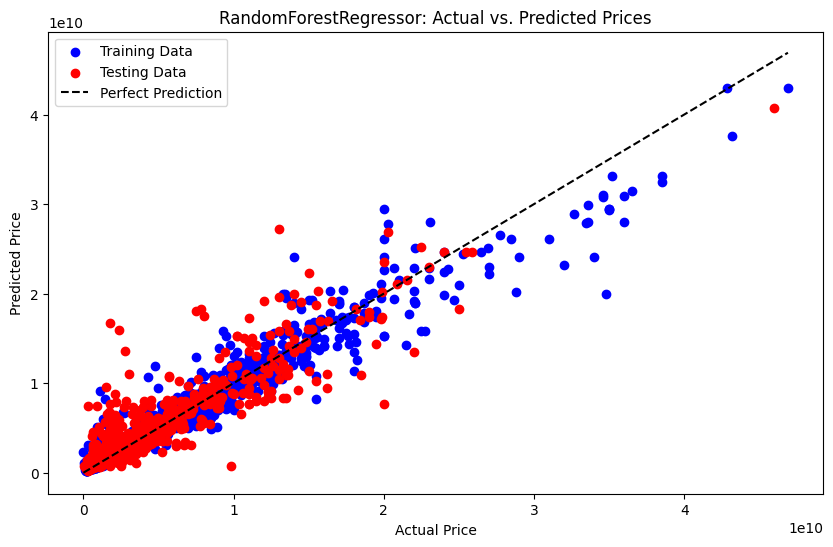

In [72]:
y_train_pred = reg.predict(x_train)
y_test_pred = reg.predict(x_test)

# Plot the original data and the predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='Training Data')
plt.scatter(y_test, y_test_pred, color='red', label='Testing Data')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='black', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('RandomForestRegressor: Actual vs. Predicted Prices')
plt.legend()
plt.show()